In [2]:
import sys
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_SigmoidProcessing import *
import pandas as pd
from matplotlib.gridspec import GridSpec

In [3]:
# Save into a class the 
class SSCreference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and printing
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax

    
def GenericFigAxis():
    fig = plt.figure(figsize=[15,5])
    gs = GridSpec(1, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
    return fig, [ax1, ax2]
    
def format_axes(fig):
    """
    Format a figure and 4 equidistant reveivers' lines from a single file. Receiver distance defines the color.
    """
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
        
    Lines = fig.axes[-1].get_lines()
    
    legend2 = fig.axes[-1].legend(Lines, ['2km','4km', '6km', '8km'], loc=1)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")

def Multi_format_axes(fig,cmap, LabelsPerColor):
    """
    Format a figure that contains different files with 
    information from several receivers for simulations under sets of blending parameters.
    """
    ColorDict = dict(enumerate(LabelsPerColor)) 
    
    
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("Time(s)")
        
    Lines = []
    Lines.append(mlines.Line2D([], [], color = "k",ls="--", linewidth = 3, label = "Reference"))
    AllLabels=["Reference"]+LabelsPerColor
    
    for idx,colcol in enumerate(cmap.colors):
        Lines.append(mlines.Line2D([], [], color = colcol,
                     linewidth = 3, label = ColorDict.get(idx)))
    
    legend2 = fig.axes[-1].legend(Lines, AllLabels, loc = 2)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")
    

# Pointing to the sem2dpack reference

In [4]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

# Colormap selection

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_6

cmap = ListedColormap(Safe_6.mpl_colors[:])

# Uniaxial h-refinement 0deg

In [6]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210316-Tilting/"
TiltedFile = LoadPickleFile(Filename = "PP1-Tilt0.0-TPList_t566_d100.1.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile1 = LoadPickleFile(Filename = "PP2-Tilt0.0-TPList_t707_d80.07999999999998.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "PP3-Tilt0.0-TPList_t1131_d50.05.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile3 = LoadPickleFile(Filename = "PP4-Tilt0.0-TPList_t2261_d25.025.pickle",
                             FolderPath = FolderTiltedPath)

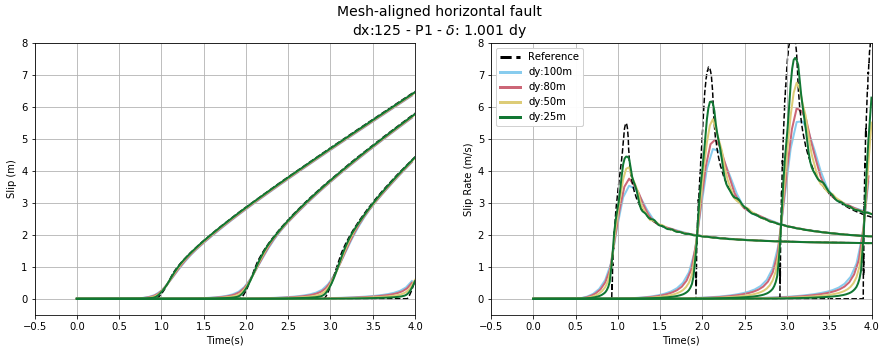

In [7]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 3
for Test1 in TiltedFile3[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["dy:100m","dy:80m",
                 "dy:50m","dy:25m"]

fig.suptitle("Mesh-aligned horizontal fault\ndx:125 - P1 - $\delta$: 1.001 dy",fontsize=14)
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]
Multi_format_axes(fig, cmap, LabelsPerColor)
axis[0].grid()
axis[1].grid()

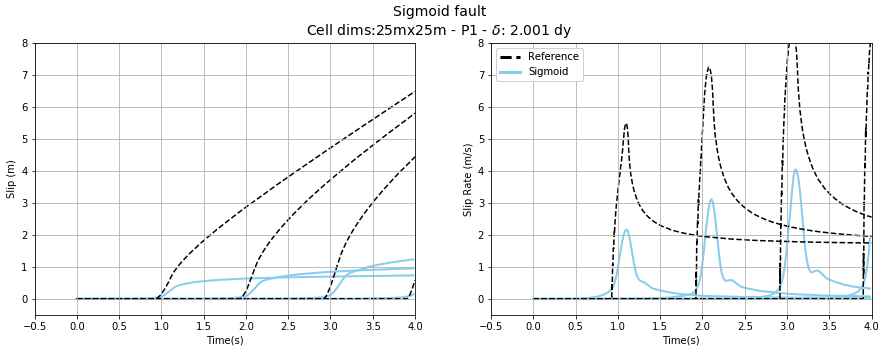

In [8]:
FolderSigmoidPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/"


SigmoidFile2 = LoadPickleFile(FolderSigmoidPath, "20210418-PP3-25x25-P3-50.025")


fig, axis = GenericFigAxis()



# Sigmoid case plotting
iidx = 0
for Test1 in SigmoidFile2:
    axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["Sigmoid"]

fig.suptitle("Sigmoid fault\nCell dims:25mx25m - P1 - $\delta$: 2.001 dy",fontsize=14)
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]
Multi_format_axes(fig, cmap, LabelsPerColor)
axis[0].grid()
axis[1].grid()

In [9]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210418-TiltingNew/"
TiltedFile = LoadPickleFile(Filename = "T1-Tilt9.0-P1-TPList_t1131_d100.05.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile1 = LoadPickleFile(Filename = "T2-Tilt18.0-P1-TPList_t1131_d100.05.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "T3-Tilt27.0-P1-TPList_t1131_d100.05.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile3 = LoadPickleFile(Filename = "T5-Tilt36.0-P1-TPList_t1131_d100.05.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile4 = LoadPickleFile(Filename = "T6-Tilt45.0-P1-TPList_t1131_d100.05.pickle",
                             FolderPath = FolderTiltedPath)


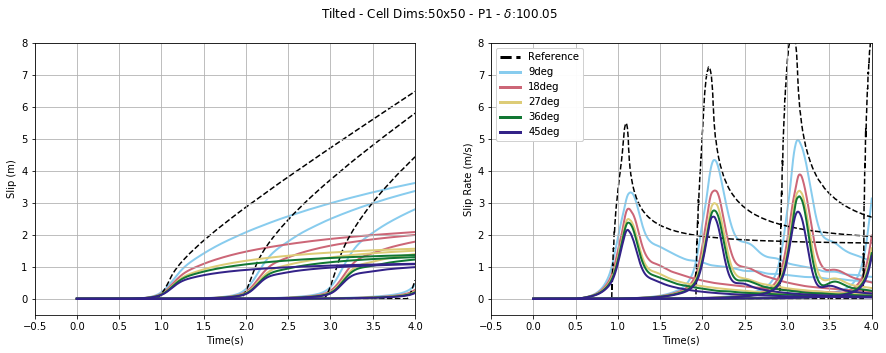

In [10]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 3
for Test1 in TiltedFile3[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 4
for Test1 in TiltedFile4[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["9deg","18deg","27deg","36deg","45deg"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted - Cell Dims:50x50 - P1 - $\delta$:100.05")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

axis[0].grid()
axis[1].grid()